# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:**  Gładysz Szymon

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [31]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import tracemalloc
import time
from scipy.linalg import solve_triangular
from scipy import linalg as sp

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [32]:
# ===== Twoja implementacja tutaj =====
m = 50; n = 12
A, b = main.spare_matrix_Abt(m, n)
norm = []
time_list = []
memory = []
# --- Metoda równań normalnych ---
tracemalloc.start()
t0 = time.perf_counter()
ATA = A.T @ A
ATb = A.T @ b
x1 = np.linalg.solve(ATA, ATb)
elapsed = time.perf_counter() - t0
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
norm.append(np.linalg.norm(A @ x1 - b))
time_list.append(elapsed)
memory.append(f"{peak/1024:.2f} KB")
# --- np.linalg.lstsq() ---
tracemalloc.start()
t0 = time.perf_counter()
x2, *_ = np.linalg.lstsq(A, b, rcond=None)
elapsed = time.perf_counter() - t0
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
norm.append(np.linalg.norm(A @ x2 - b))
time_list.append(elapsed)
memory.append(f"{peak/1024:.2f} KB")
# --- Rozkład QR ---
tracemalloc.start()
t0 = time.perf_counter()
Q, R = np.linalg.qr(A)
Qtb = Q.T @ b
x3 = sp.solve_triangular(R, Qtb)
elapsed = time.perf_counter() - t0
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
norm.append(np.linalg.norm(A @ x3 - b))
time_list.append(elapsed)
memory.append(f"{peak/1024:.2f} KB")
# --- Rozkład SVD ---
tracemalloc.start()
t0 = time.perf_counter()
U, s, Vt = np.linalg.svd(A, full_matrices=False)
x4 = Vt.T @ (np.diag(1/s) @ (U.T @ b))
elapsed = time.perf_counter() - t0
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
norm.append(np.linalg.norm(A @ x4 - b))
time_list.append(elapsed)
memory.append(f"{peak/1024:.2f} KB")
# --- Wyniki ---
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time_list[0])[:29]} s")
print(f"Druga metoda    :  {str(time_list[1])[:29]} s")
print(f"Trzecia metoda  :  {str(time_list[2])[:29]} s")
print(f"Czwarta metoda  :  {str(time_list[3])[:29]} s")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.320e-07
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  0.0006645999965257943 s
Druga metoda    :  0.0006434999813791364 s
Trzecia metoda  :  0.0025938999897334725 s
Czwarta metoda  :  0.004436200018972158 s

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  13.40 KB
Druga metoda    :  12.35 KB
Trzecia metoda  :  18.28 KB
Czwarta metoda  :  19.33 KB


In [33]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time_list[0])[:29]} s")
print(f"Druga metoda    :  {str(time_list[1])[:29]} s")
print(f"Trzecia metoda  :  {str(time_list[2])[:29]} s")
print(f"Czwarta metoda  :  {str(time_list[3])[:29]} s")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.320e-07
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  0.0006645999965257943 s
Druga metoda    :  0.0006434999813791364 s
Trzecia metoda  :  0.0025938999897334725 s
Czwarta metoda  :  0.004436200018972158 s

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  13.40 KB
Druga metoda    :  12.35 KB
Trzecia metoda  :  18.28 KB
Czwarta metoda  :  19.33 KB


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [34]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Współczynnik kierunkowy a = 0.7861
Wyraz wolny b = -3.5036
Norma residuum = 58.3536
Współczynnik determinacji R² = 0.9505


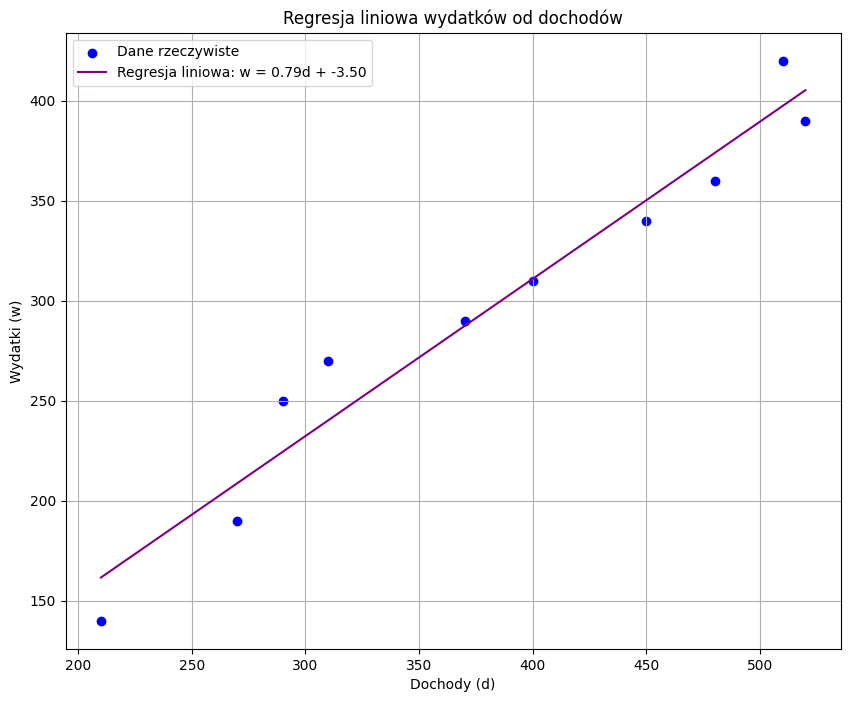

In [48]:
# ===== Twoja implementacja tutaj =====

A = np.vstack([d, np.ones(len(d))]).T
a, b = np.linalg.lstsq(A, w, rcond=None)[0]
w_pred = a * d + b
residuum = np.linalg.norm(w - w_pred)
r2 = 1 - np.sum((w - w_pred)**2) / np.sum((w - np.mean(w))**2)
print(f"Współczynnik kierunkowy a = {a:.4f}")
print(f"Wyraz wolny b = {b:.4f}")
print(f"Norma residuum = {residuum:.4f}")
print(f"Współczynnik determinacji R² = {r2:.4f}")
plt.figure(figsize=(10,8))
plt.scatter(d, w, color='blue', label='Dane rzeczywiste')
plt.plot(d, w_pred, color='purple', label=f'Regresja liniowa: w = {a:.2f}d + {b:.2f}')
plt.xlabel("Dochody (d)")
plt.ylabel("Wydatki (w)")
plt.title("Regresja liniowa wydatków od dochodów")
plt.legend()
plt.grid(True)
plt.show()

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

In [36]:
# ===== Twoja implementacja tutaj =====
#Punkt 1
x1 = np.random.normal(0,1,[100,1])
x2 = np.random.normal(0,1,[100,1])
epsilon = np.random.normal(0,1,[100,1])
y = x1 - 0.5*x2 + epsilon + 2

b1 =
[[1.99978608]
 [1.13310121]]
Residual norm = None


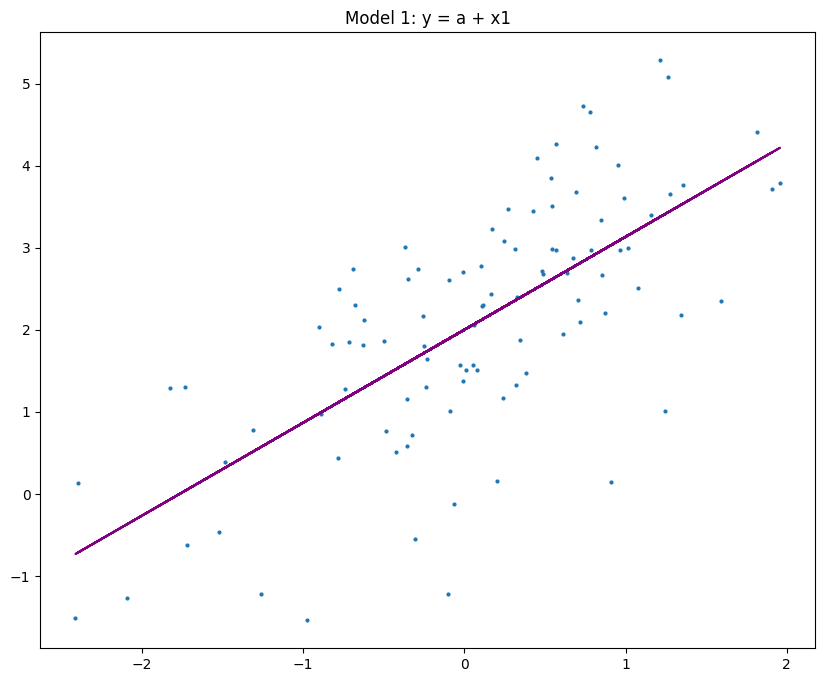

In [49]:
#Punkt 2
#2.1 y = a + x1
Z1 = np.concatenate([np.ones([100,1]), x1], 1)
Q, R = np.linalg.qr(Z1)
qy1 = Q.T @ y
b1 = sp.solve_triangular(R, qy1)
y1_pred = b1[0] + b1[1] * x1
norm1 = main.residual_norm(Z1, b1, y)
plt.figure(figsize=(10,8))
plt.scatter(x1, y, s=4)
plt.plot(x1, y1_pred, 'purple')
plt.title("Model 1: y = a + x1")
print("b1 =")
print(b1)
print("Residual norm =", norm1)



b2 =
[[ 2.05215301]
 [-0.35692229]]
Residual norm = None


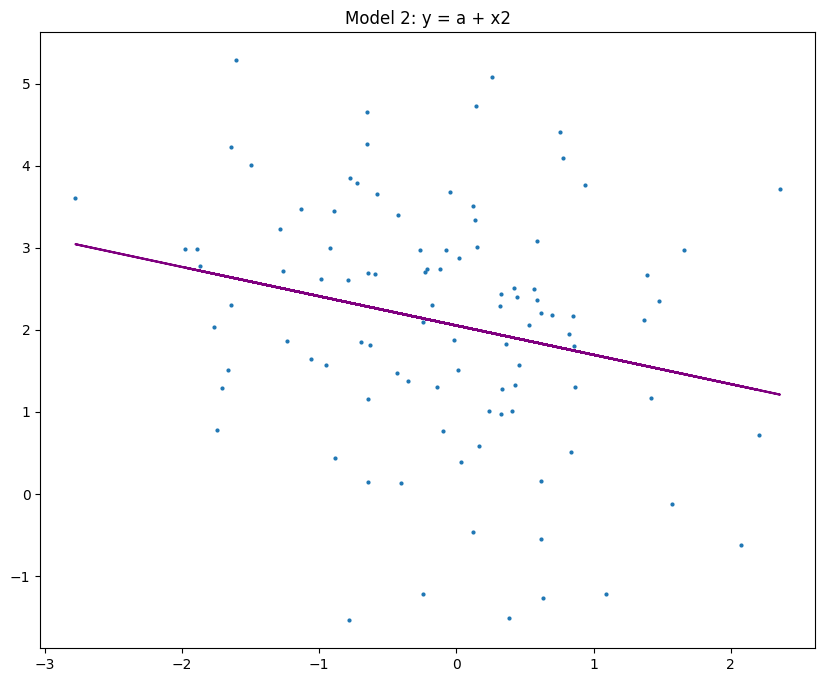

In [50]:
# 2.2 y = a + x2
Z2 = np.concatenate([np.ones([100,1]), x2], axis=1)
Q, R = np.linalg.qr(Z2)
qy2 = Q.T @ y
b2 = sp.solve_triangular(R, qy2)
y2_pred = b2[0] + b2[1] * x2
norm2 = main.residual_norm(Z2, b2, y)
plt.figure(figsize=(10,8))
plt.scatter(x2, y, s=4)
plt.plot(x2, y2_pred, 'purple')
plt.title("Model 2: y = a + x2")
print("\nb2 =")
print(b2)
print("Residual norm =", norm2)


b3 =
[[ 1.95680498]
 [ 1.1519945 ]
 [-0.40234241]]
Residual norm = None


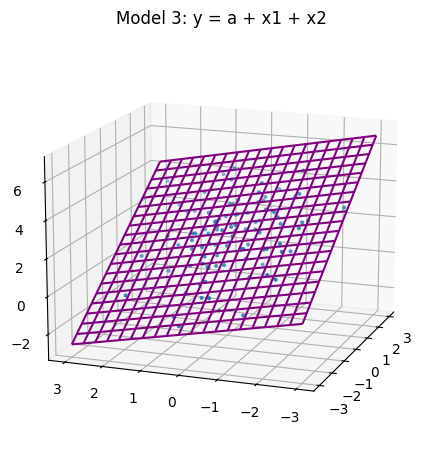

In [51]:
#2.3 y = a + x1 + x2
Z3 = np.concatenate([np.ones([100,1]), x1, x2], axis=1)
Q, R = np.linalg.qr(Z3)
qy3 = Q.T @ y
b3 = sp.solve_triangular(R, qy3)
y3_pred = b3[0] + b3[1] * x1 + b3[2] * x2
norm3 = main.residual_norm(Z3, b3, y)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1, projection='3d')
x_grid, y_grid = np.meshgrid(
    np.linspace(-3, 3, 20), 
    np.linspace(-3, 3, 20)
)
z_pred = b3[0] + b3[1] * x_grid + b3[2] * y_grid
ax1.plot_wireframe(x_grid, y_grid, z_pred, color='purple')
ax1.scatter(x1, x2, y, s=4)
ax1.set_title("Model 3: y = a + x1 + x2")
ax1.view_init(15, 200)
print("\nb3 =")
print(b3)
print("Residual norm =", norm3)

---

In [40]:
#2.4 y = a + x1 + x2 + x1*x2
Z4 = np.concatenate([np.ones([100,1]), x1, x2, x1 * x2], axis=1)

Q, R = np.linalg.qr(Z4)
qy4 = Q.T @ y
b4 = sp.solve_triangular(R, qy4)

y4_pred = (
    b4[0] 
    + b4[1] * x1 
    + b4[2] * x2 
    + b4[3] * x1 * x2
)
norm4 = main.residual_norm(Z4, b4, y)
print("\nb4 =")
print(b4)
print("Residual norm =", norm4)


b4 =
[[ 1.95602684]
 [ 1.15128674]
 [-0.40545386]
 [ 0.01678105]]
Residual norm = None


**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)